# The 5-Day Low And Low of The Range Trading Strategy

1. IBS must be lower than 0.25
2. The close must be lower than the 5-day low
3. If 1 and 2 are true, then buy
4. Sell after 5 days

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing the dataset
data = pd.read_csv('./Candle_data/^NSEI-MAX.csv', index_col=0, parse_dates=True)
data = data.dropna()
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

print(data.head())
print('#' * 30)
print(data.tail())
print('#' * 30)
print(data.info())

                   Open         High          Low        Close  Volume
Date                                                                  
2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902     0.0
2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195     0.0
2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098     0.0
2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805     0.0
2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805     0.0
##############################
                    Open          High           Low         Close    Volume
Date                                                                        
2023-12-04  20601.949219  20702.650391  20507.750000  20686.800781  381100.0
2023-12-05  20808.900391  20864.050781  20711.150391  20855.099609  421000.0
2023-12-06  20950.750000  20961.949219  20852.150391  20937.699219  359200.0
2023-12-07  20932.400391  20941.250000  20850.800781  20901.150391  275000.0
2023-12-08

<AxesSubplot:xlabel='Date'>

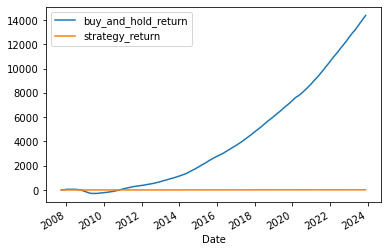

In [5]:
# Strategy rules,
# 1. IBS must be lower than 0.25
# 2. The close must be lower than the 5-day low
# 3. If 1 and 2 are true, then buy
# 4. Sell after 5 days

# Calculate the 5-day low
data['5d_low'] = data['Low'].rolling(5).min()
data = data.dropna()

# Calculate IBS
data['IBS'] = (data['Close'] - data['5d_low']) / (data['High'] - data['Low'])

# Calculate the returns of the strategy
data['5d_future_close'] = data['Close'].shift(-5)
data['return'] = (data['5d_future_close'] - data['Close']) / data['Close']
data['strategy_return'] = data['return'] * data['IBS']

# Calculate the returns of the buy and hold strategy
data['buy_and_hold_return'] = data['return'].cumsum()

# Plot the performance of the strategy
data[['buy_and_hold_return', 'strategy_return']].cumsum().plot()


<AxesSubplot:xlabel='Date'>

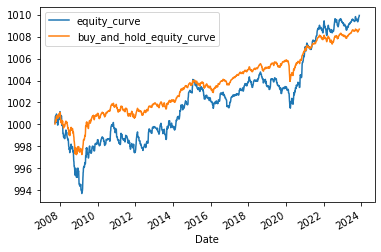

In [6]:
# Plot equity curve of the strategy if we invested $1,000 in the strategy
# and the buy and hold strategy
initial_capital = float(1000)
data['equity_curve'] = data['strategy_return'].cumsum() + initial_capital
data['buy_and_hold_equity_curve'] = data['buy_and_hold_return'] + initial_capital
data[['equity_curve', 'buy_and_hold_equity_curve']].plot()



Max drawdown: 0.007461934508165473
Average drawdown: 0.0015729597346804379
Max drawdown duration: 2009-03-03 00:00:00
Buy and hold strategy return: nan
Strategy return: nan
Buy and hold Sharpe ratio: 1.3050888927744229
Strategy Sharpe ratio: 0.044042496090196066


<AxesSubplot:xlabel='Date'>

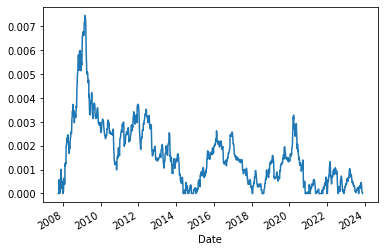

In [8]:
# Print drawdown statistics
running_max = np.maximum.accumulate(data['equity_curve'].dropna())
drawdown = (running_max - data['equity_curve']) / running_max
print('Max drawdown:', drawdown.max())
print('Average drawdown:', drawdown.mean())
print('Max drawdown duration:', drawdown.idxmax())

# Print the cumulative return of the buy and hold strategy and the strategy
print('Buy and hold strategy return:', data['buy_and_hold_return'].iloc[-1])
print('Strategy return:', data['strategy_return'].iloc[-1])

# Print the Sharpe ratio of the buy and hold strategy and the strategy
print('Buy and hold Sharpe ratio:', data['buy_and_hold_return'].mean() / data['buy_and_hold_return'].std())
print('Strategy Sharpe ratio:', data['strategy_return'].mean() / data['strategy_return'].std())

# Plot the distribution of the buy and hold strategy and the strategy
# data[['buy_and_hold_return', 'strategy_return']].hist(bins=50)

# Plot drawdowns of the buy and hold strategy and the strategy
drawdown.plot()
